In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
with open('./private-gpt/f.json', 'r') as f:
    data = json.load(f)

In [3]:
data

{'__main__': {'bacon': 0,
  'imports': ['private_gpt',
   'private_gpt.__main__',
   'private_gpt.components',
   'private_gpt.components.embedding',
   'private_gpt.components.embedding.custom',
   'private_gpt.components.embedding.custom.sagemaker',
   'private_gpt.components.embedding.embedding_component',
   'private_gpt.components.ingest',
   'private_gpt.components.ingest.ingest_component',
   'private_gpt.components.ingest.ingest_helper',
   'private_gpt.components.llm',
   'private_gpt.components.llm.custom',
   'private_gpt.components.llm.custom.sagemaker',
   'private_gpt.components.llm.llm_component',
   'private_gpt.components.llm.prompt_helper',
   'private_gpt.components.node_store',
   'private_gpt.components.node_store.node_store_component',
   'private_gpt.components.vector_store',
   'private_gpt.components.vector_store.batched_chroma',
   'private_gpt.components.vector_store.vector_store_component',
   'private_gpt.constants',
   'private_gpt.di',
   'private_gpt.lau

In [4]:
def calculate_fan_metrics(data):
    fan_in = {}
    fan_out = {}
    for module, info in data.items():
        fan_in[module] = len(info.get('imported_by', []))
        fan_out[module] = len(info.get('imports', []))
    return fan_in, fan_out

In [5]:
fan_in, fan_out = calculate_fan_metrics(data)

In [6]:
fan_in

{'__main__': 0,
 'private_gpt': 26,
 'private_gpt.__main__': 1,
 'private_gpt.components': 9,
 'private_gpt.components.embedding': 6,
 'private_gpt.components.embedding.custom': 2,
 'private_gpt.components.embedding.custom.sagemaker': 2,
 'private_gpt.components.embedding.embedding_component': 5,
 'private_gpt.components.ingest': 3,
 'private_gpt.components.ingest.ingest_component': 2,
 'private_gpt.components.ingest.ingest_helper': 2,
 'private_gpt.components.llm': 5,
 'private_gpt.components.llm.custom': 2,
 'private_gpt.components.llm.custom.sagemaker': 2,
 'private_gpt.components.llm.llm_component': 4,
 'private_gpt.components.llm.prompt_helper': 2,
 'private_gpt.components.node_store': 4,
 'private_gpt.components.node_store.node_store_component': 4,
 'private_gpt.components.vector_store': 5,
 'private_gpt.components.vector_store.batched_chroma': 2,
 'private_gpt.components.vector_store.vector_store_component': 4,
 'private_gpt.constants': 4,
 'private_gpt.di': 4,
 'private_gpt.lau

In [7]:
fan_out

{'__main__': 62,
 'private_gpt': 0,
 'private_gpt.__main__': 4,
 'private_gpt.components': 0,
 'private_gpt.components.embedding': 0,
 'private_gpt.components.embedding.custom': 0,
 'private_gpt.components.embedding.custom.sagemaker': 0,
 'private_gpt.components.embedding.embedding_component': 10,
 'private_gpt.components.ingest': 0,
 'private_gpt.components.ingest.ingest_component': 9,
 'private_gpt.components.ingest.ingest_helper': 0,
 'private_gpt.components.llm': 0,
 'private_gpt.components.llm.custom': 0,
 'private_gpt.components.llm.custom.sagemaker': 0,
 'private_gpt.components.llm.llm_component': 11,
 'private_gpt.components.llm.prompt_helper': 0,
 'private_gpt.components.node_store': 0,
 'private_gpt.components.node_store.node_store_component': 4,
 'private_gpt.components.vector_store': 0,
 'private_gpt.components.vector_store.batched_chroma': 0,
 'private_gpt.components.vector_store.vector_store_component': 10,
 'private_gpt.constants': 0,
 'private_gpt.di': 3,
 'private_gpt.

In [20]:
def plot_fan_metrics(fan_in, fan_out):
    modules = [mod.replace('private_gpt.', '') for mod in fan_in.keys()]
    fan_in_values = fan_in.values()
    fan_out_values = fan_out.values()

    fig, ax = plt.subplots(figsize=(15, 8))
    bar_width = 0.35  # Width of each bar
    index = np.arange(len(modules))  # X-axis positions

    bars_in = ax.bar(index, fan_in_values, bar_width, label='Fan-In', color='skyblue')
    bars_out = ax.bar(index + bar_width, fan_out_values, bar_width, label='Fan-Out', color='salmon')

    ax.set_xlabel('Modules', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('Fan-In vs Fan-Out per Module', fontsize=14, pad=15)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(modules, rotation=90, ha='center', fontsize=8)
    ax.legend()
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2, height,
                f'{int(height)}', ha='center', va='bottom', fontsize=8
            )

    add_labels(bars_in)
    add_labels(bars_out)
    plt.tight_layout()
    plt.savefig('fan_in_out_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

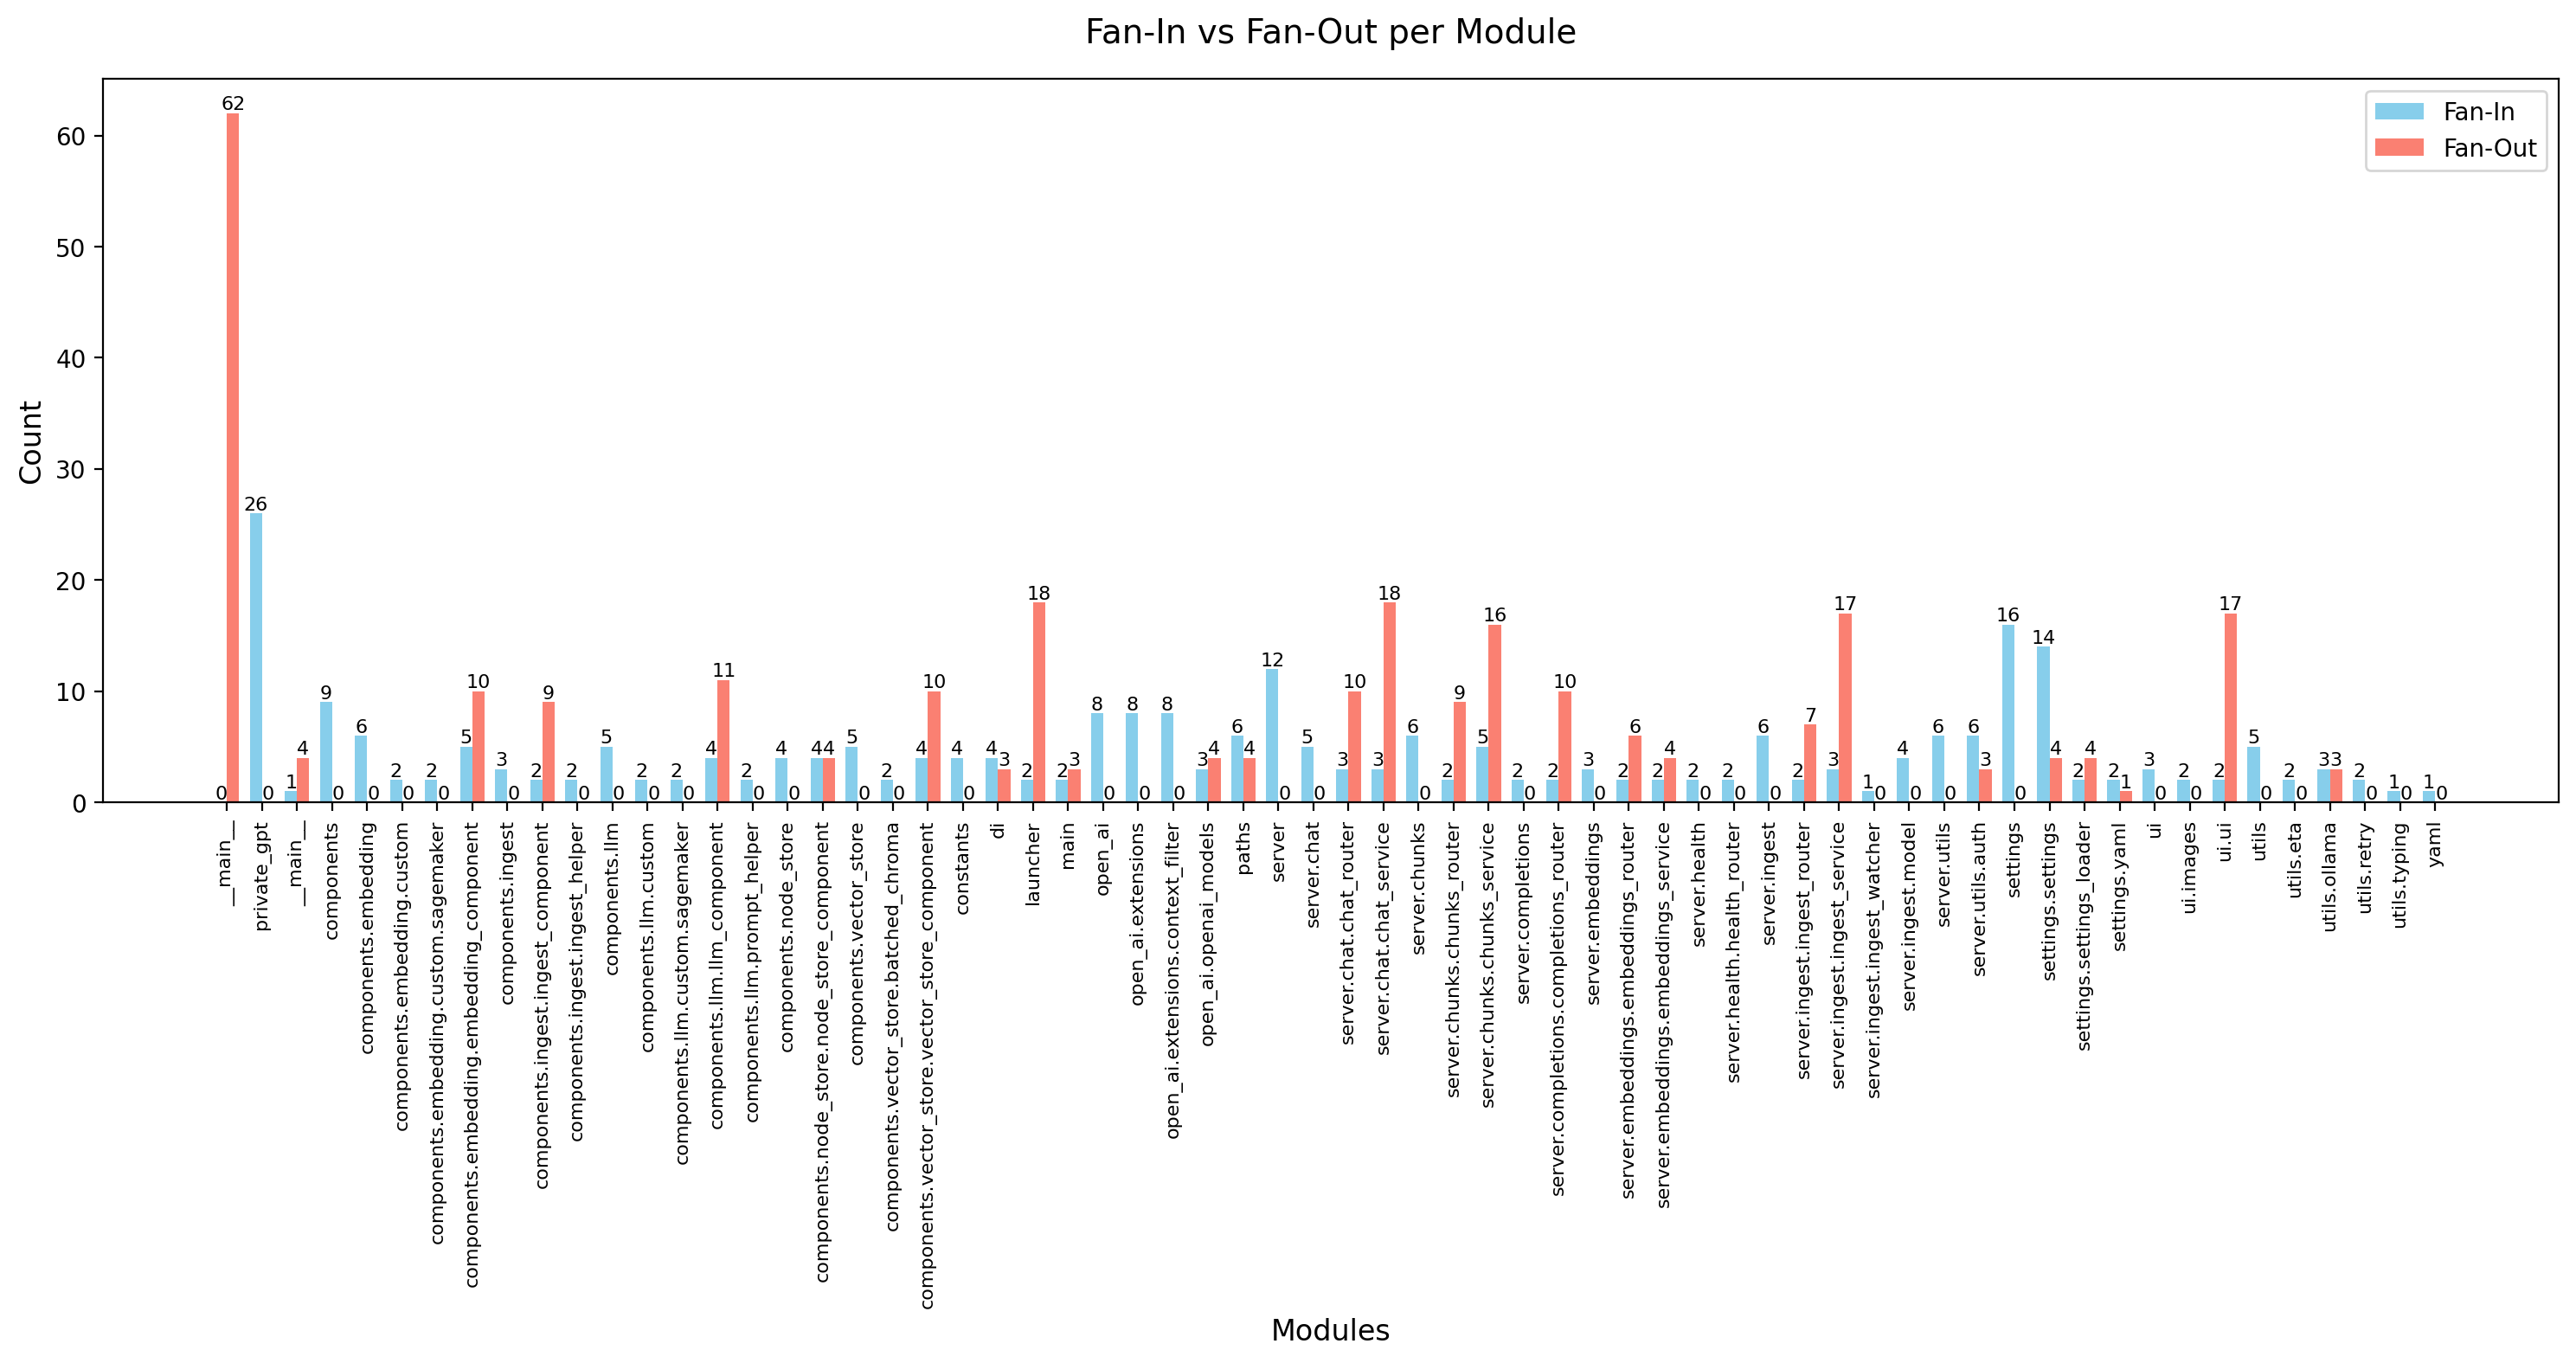

In [21]:
plot_fan_metrics(fan_in, fan_out)

In [24]:
def find_highly_coupled(fan_in, fan_out, threshold=10):
    highly_coupled = []
    modul, fan_ins, fan_outs = [], [], []
    for module in fan_in:
        if fan_in[module] >= threshold or fan_out[module] >= threshold:
            highly_coupled.append((module, fan_in[module], fan_out[module]))
            modul.append(module)
            fan_ins.append(fan_in[module])
            fan_outs.append(fan_out[module])

    modules = [mod.replace('private_gpt.', '') for mod in modul]
    fig, ax = plt.subplots(figsize=(15, 8))
    bar_width = 0.35
    index = np.arange(len(modules))

    bars_in = ax.bar(index, fan_ins, bar_width, label='Fan-In', color='skyblue')
    bars_out = ax.bar(index + bar_width, fan_outs, bar_width, label='Fan-Out', color='salmon')

    ax.set_xlabel('Modules', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('Fan-In vs Fan-Out per Highly-Coupled Module', fontsize=14, pad=15)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(modules, rotation=90, ha='center', fontsize=8)
    ax.legend()
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2, height,
                f'{int(height)}', ha='center', va='bottom', fontsize=8
            )

    add_labels(bars_in)
    add_labels(bars_out)
    plt.tight_layout()
    plt.savefig('fan_in_out_plotNew.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return highly_coupled

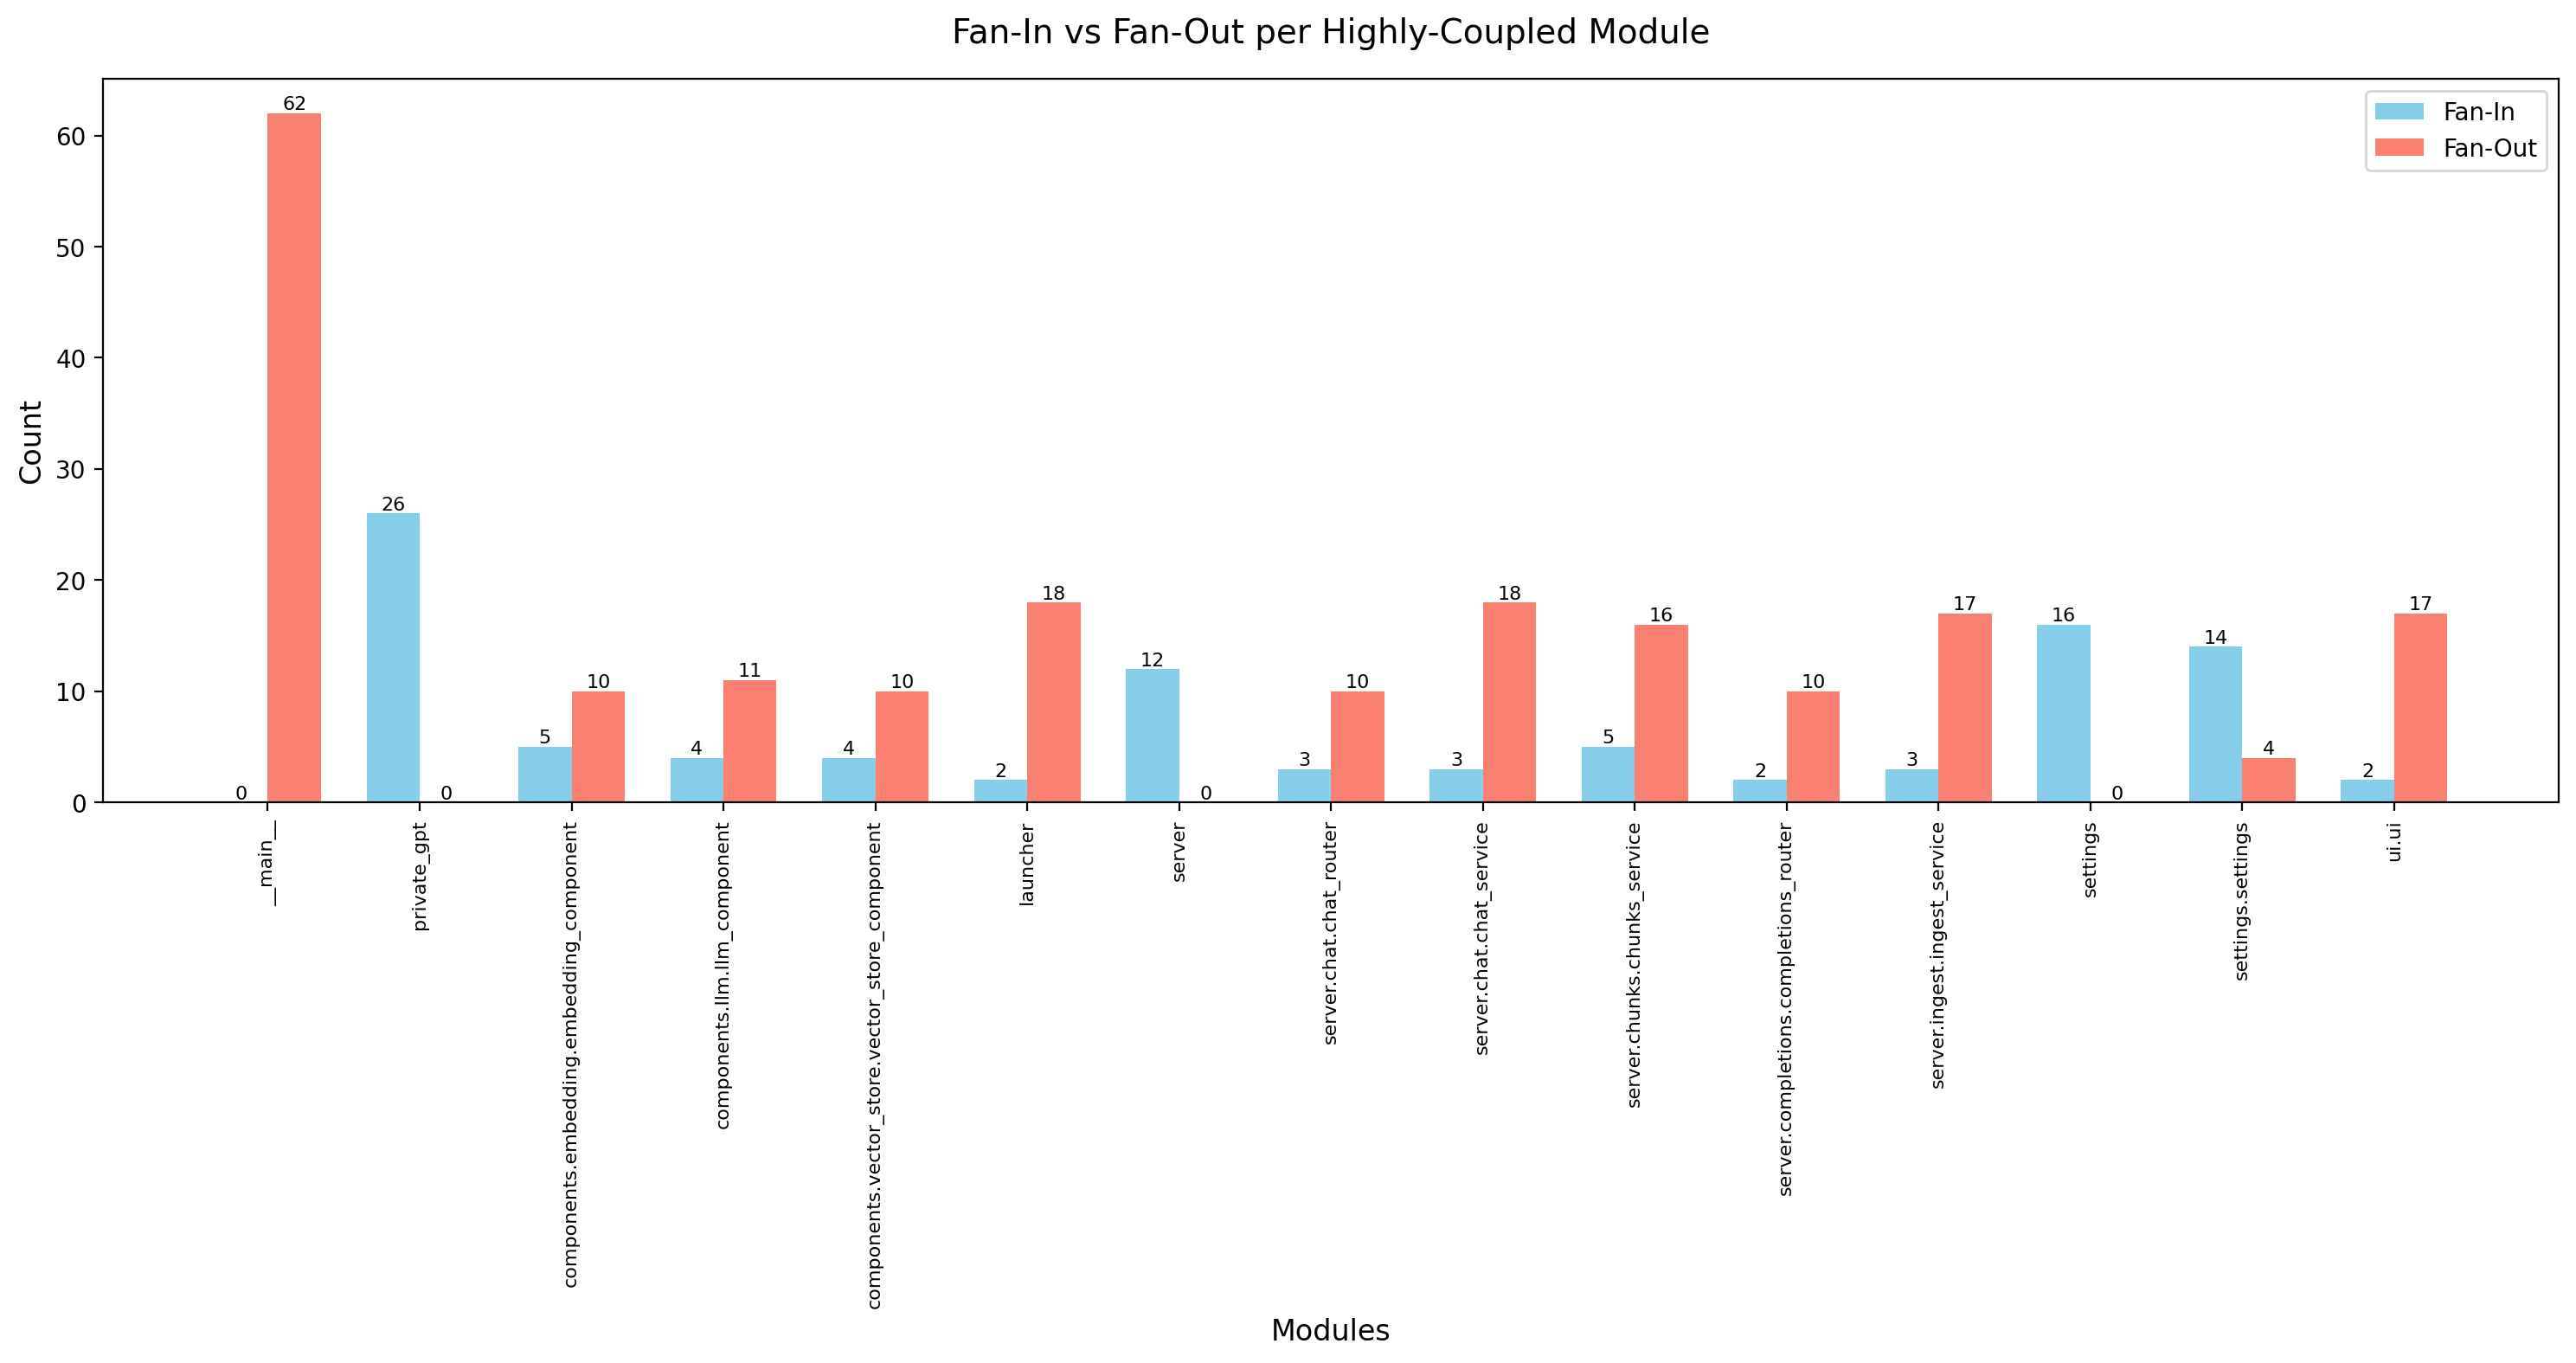

Highly Coupled Modules (Fan-in, Fan-out):
  __main__: Fan-in=0, Fan-out=62
  private_gpt: Fan-in=26, Fan-out=0
  private_gpt.components.embedding.embedding_component: Fan-in=5, Fan-out=10
  private_gpt.components.llm.llm_component: Fan-in=4, Fan-out=11
  private_gpt.components.vector_store.vector_store_component: Fan-in=4, Fan-out=10
  private_gpt.launcher: Fan-in=2, Fan-out=18
  private_gpt.server: Fan-in=12, Fan-out=0
  private_gpt.server.chat.chat_router: Fan-in=3, Fan-out=10
  private_gpt.server.chat.chat_service: Fan-in=3, Fan-out=18
  private_gpt.server.chunks.chunks_service: Fan-in=5, Fan-out=16
  private_gpt.server.completions.completions_router: Fan-in=2, Fan-out=10
  private_gpt.server.ingest.ingest_service: Fan-in=3, Fan-out=17
  private_gpt.settings: Fan-in=16, Fan-out=0
  private_gpt.settings.settings: Fan-in=14, Fan-out=4
  private_gpt.ui.ui: Fan-in=2, Fan-out=17


In [25]:
highly_coupled = find_highly_coupled(fan_in, fan_out, threshold=10)
print("Highly Coupled Modules (Fan-in, Fan-out):")
for module, fi, fo in highly_coupled:
    print(f"  {module}: Fan-in={fi}, Fan-out={fo}")

In [13]:
def detect_cycles(data):
    G = nx.DiGraph()
    for module, info in data.items():
        for imported in info.get('imports', []):
            G.add_edge(module, imported)
    
    cycles = list(nx.simple_cycles(G))
    return cycles

In [17]:
cycles = detect_cycles(data)
print("\nCyclic Dependencies:")
if cycles:
    for cycle in cycles:
        print(f"  {' -> '.join(cycle)} -> {cycle[0]}")
else:
    print("  None detected")


Cyclic Dependencies:
  private_gpt.settings.settings -> private_gpt.di -> private_gpt.settings.settings


In [14]:
def find_unused_modules(data):
    unused = []
    for module, info in data.items():
        imported_by = info.get('imported_by', [])
        if not imported_by or (len(imported_by) == 1 and imported_by[0] == '__main__'):
            unused.append(module)
    return unused

In [18]:
unused = find_unused_modules(data)
print("\nPotentially Unused Modules:")
if unused:
    for module in unused:
        print(f"  {module}")
else:
    print("  None found")


Potentially Unused Modules:
  __main__
  private_gpt.__main__
  private_gpt.server.ingest.ingest_watcher
  private_gpt.utils.typing


In [15]:
def assess_depth(data):
    depth = defaultdict(int)
    for module, info in data.items():
        bacon = info.get('bacon', 0)
        depth[bacon] += 1
    return depth

In [19]:
depth = assess_depth(data)
print("\nDependency Depth (Bacon Value Distribution):")
for bacon, count in sorted(depth.items()):
    print(f"  Bacon={bacon}: {count} modules")


Dependency Depth (Bacon Value Distribution):
  Bacon=0: 1 modules
  Bacon=1: 62 modules
  Bacon=2: 1 modules


In [25]:
from pyvis.network import Network

def visualize_graph(data, highly_coupled_modules):
    G = nx.DiGraph()
    for module, info in data.items():
        for imported in info.get('imports', []):
            G.add_edge(module, imported)

    colors = []
    for node in G.nodes():
        if any(node == hc[0] for hc in highly_coupled_modules):
            colors.append('red')
        else:
            colors.append('lightblue')
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=50, edge_color='gray', arrows=True)
    plt.title("Dependency Graph (Red = Highly Coupled)")
    plt.savefig('dependency_graph.png', dpi=600)
    plt.show()

    # Interactive HTML
    net = Network(notebook=True, height='750px', width='100%')
    net.from_nx(G)
    for node in G.nodes():
        if any(node == hc[0] for hc in highly_coupled_modules):
            net.get_node(node)['color'] = 'red'
        else:
            net.get_node(node)['color'] = 'lightblue'
    net.show('dependency_graph.html')

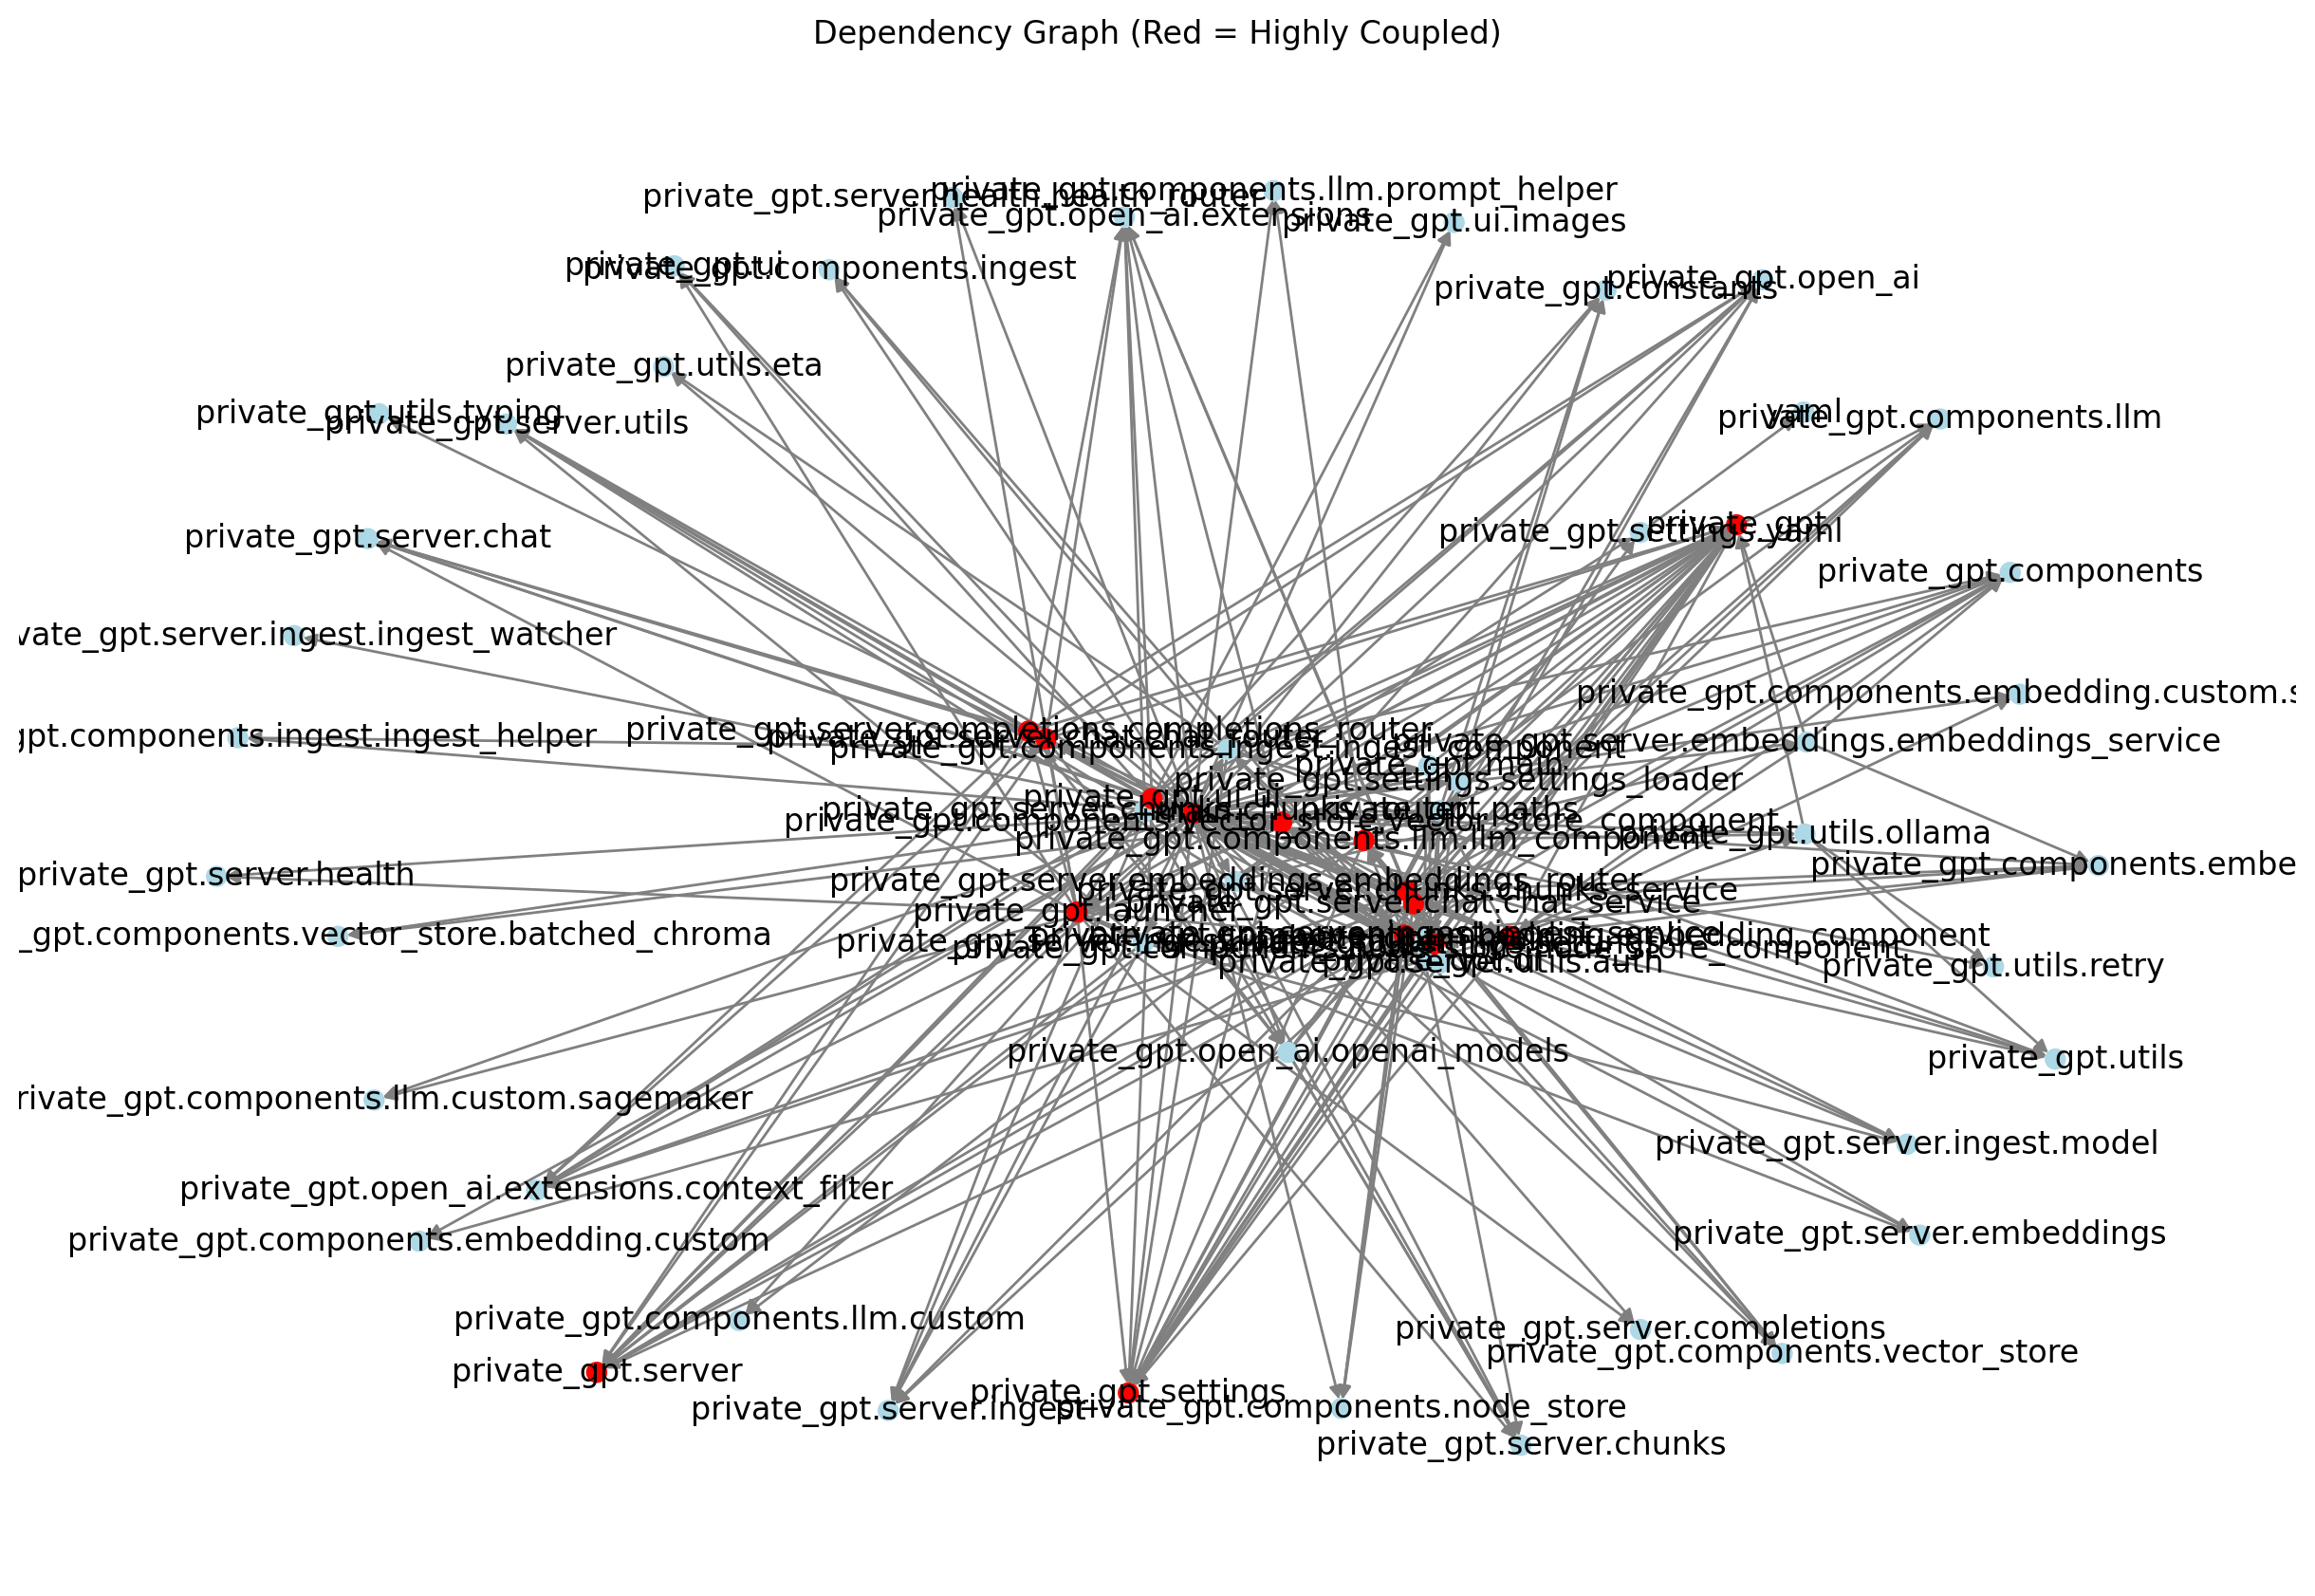

dependency_graph.html


In [26]:
visualize_graph(data, highly_coupled)